# Финальная работа, специализация: **Data Analyst**
- Тема: Анализ сайта "Сберавтоподписка"
- **Исходные данные: ga_hits.csv** (база событий в рамках сессии), **ga_sessions.csv** (база визитов)
- **Выходные данные: ga_hits_clean.csv, ga_sessions_clean.csv, ga_joined.csv**

**Задание**
1. Проведите подготовительную работу:
- Прочитайте предоставленный датасет.
- Ознакомьтесь с описаниями представленных атрибутов.
- Оцените полноту и чистоту данных. Попытайтесь понять, что стоит за этими данными в реальном мире. Приведите данные в удобный/нормальный вид для дальнейшей работы.
2. Проведите разведочный анализ данных:
- Проведите базовую чистку (дубликаты, пустые значения, типизация данных, ненужные атрибуты).
- Посмотрите на распределение ключевых атрибутов, их отношения.

# 0. Импорт сторонних библиотек

In [1]:
import pandas as pd
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.ticker import FormatStrFormatter

# Часть 1: Обработка данных ga_hits.csv, ga_sessions.csv

## 1. Загрузка данных

### 1.1 ga_hits

In [2]:
# Чтение файла в датафрейм
df_h = pd.read_csv('data/ga_hits.csv')

In [3]:
df_h.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [4]:
print("Размерность исходного датафрейма")
df_h.shape

Размерность исходного датафрейма


(15726470, 11)

**Описание атрибутов датафрейма событий из файла ga_hits.csv:**

- session_id - ID визита;
- hit_date - дата события;
- hit_time - время события;
- hit_number - порядковый номер события в рамках сессии;
- hit_type - тип события;
- hit_referer - источник события;
- hit_page_path - страница события;
- event_category - тип действия;
- event_action - действие;
- event_label - тег действия;
- event_value - значение результата действия.

### 1.2 ga_sessions

In [5]:
# Чтение файла в датафрейм
df_s = pd.read_csv('data/ga_sessions.csv', low_memory=False)

In [6]:
df_s.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [7]:
print("Размерность исходного датафрейма")
df_s.shape

Размерность исходного датафрейма


(1860042, 18)

Описание атрибутов датафрейма визитов из файла ga_sessions.csv:

- session_id - ID визита;
- client_id - ID посетителя;
- visit_date - дата визита;
- visit_time - время визита;
- visit_number - порядковый номер визита клиента;
- utm_source - канал привлечения;
- utm_medium - тип привлечения;
- utm_campaign - рекламная кампания;
- utm_keyword - ключевое слово;
- device_category - тип устройства;
- device_os - ОС устройства;
- device_brand - марка устройства;
- device_model - модель устройства;
- device_screen_resolution - разрешение устройства;
- evice_browser - браузер;
- geo_country - страна;
- geo_city - город.

## 2. Data Preparation

### 2.1 Изучение статистик признаков

#### 2.1.1 ga_hits

In [8]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [9]:
# Статистики числовых признаков
df_h.describe()

,hit_time,hit_number,event_value
count,6.566148e+06,1.572647e+07,0.0
mean,2.091050e+05,2.356715e+01,NaN
std,4.032110e+05,2.887713e+01,NaN
min,0.000000e+00,1.000000e+00,NaN
25%,2.412000e+04,7.000000e+00,NaN
50%,8.994100e+04,1.500000e+01,NaN
75%,2.195352e+05,2.900000e+01,NaN
max,1.315688e+07,5.000000e+02,NaN


In [10]:
df_h['hit_number'].describe().apply(lambda x: f'{x: 1.0f}')

count     15726470
mean            24
std             29
min              1
25%              7
50%             15
75%             29
max            500
Name: hit_number, dtype: object

In [11]:
# Статистики категориальных признаков
df_h[['session_id', 'event_action', 'hit_referer', 'hit_type', 'event_label', 'event_category']].describe()

,session_id,event_action,hit_referer,hit_type,event_label,event_category
count,15726470,15726470,9451666,15726470,11966286,15726470
unique,1734610,230,37873,1,39825,52
top,5442565791571325612.1632449195.1632449195,view_card,HbolMJUevblAbkHClEQa,event,KclpemfoHstknWHFiLit,card_web
freq,768,3558985,8879187,15726470,6505447,7456998


**Вывод:** Весь столбец hit_type имеет одно значение event, поэтому признак неинформативен

In [12]:
# Уникальные значения столбца event_category - тип действия
df_h['event_category'].value_counts()

card_web                         7456998
search_form                      2423605
sub_page_view                    1986074
sub_button_click                 1073471
listing_ads                      1040468
cars                              358915
sap_search_form                   356596
quiz                              263134
auth                              189373
sap_search__form                  188129
jivosite                           88443
chat                               85007
ad_banner                          40441
offers                             31218
navigation                         27075
footer                             20297
sub_submit                         18495
greenday_sub_button_click          15425
main_banners                       14142
profile_menu                       13879
scrolling_main_page                12160
active_invitation                   8478
header                              3531
my_idea                             2319
greenday_listing

#### 2.1.2 ga_sessions

In [13]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [14]:
# Статистики числовых признаков
df_s['visit_number'].describe().apply(lambda x: f'{x: 1.0f}')

count     1860042
mean            3
std            12
min             1
25%             1
50%             1
75%             2
max           564
Name: visit_number, dtype: object

In [15]:
# Статистики категориальных признаков
df_s[['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword']].describe()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword
count,1859945,1860042,1640439,1524427,777981
unique,293,56,412,286,1219
top,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo
freq,578290,552272,463481,1006599,506819


In [16]:
# Статистики категориальных признаков
df_s[['device_category', 'device_os', 'device_brand', 'device_model', 'device_screen_resolution', 'device_browser']].describe()

,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser
count,1860042,789904,1492864,16338,1860042,1860042
unique,3,13,205,104,5039,57
top,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome
freq,1474871,464054,551088,9778,169090,1013436


In [17]:
# Статистики категориальных признаков
df_s[['session_id', 'client_id', 'geo_country', 'geo_city']].describe()

,session_id,client_id,geo_country,geo_city
count,1860042,1860042,1860042,1860042
unique,1860042,1391719,166,2548
top,9055434745589932991.1637753792.1637753792,1750498477.1629450062,Russia,Moscow
freq,1,462,1800565,805329


In [18]:
# Уникальные значения device_category - тип устройства
df_s['device_category'].value_counts()

mobile     1474871
desktop     366863
tablet       18308
Name: device_category, dtype: int64

In [19]:
# Уникальные значения device_os - ОС устройства
df_s['device_os'].value_counts()

Android          464054
iOS              207104
Windows           88307
Macintosh         24824
Linux              5120
(not set)           364
Chrome OS            83
BlackBerry           27
Tizen                 7
Samsung               4
Windows Phone         4
Firefox OS            3
Nokia                 3
Name: device_os, dtype: int64

In [20]:
# Уникальные значения географии стран и городов
df_s[['geo_country', 'geo_city']].value_counts()

geo_country  geo_city        
Russia       Moscow              805329
             Saint Petersburg    296788
             (not set)            70021
             Yekaterinburg        35788
             Krasnodar            32243
                                  ...  
Denmark      Aalborg                  1
Russia       Menzelinsk               1
Denmark      Aarhus                   1
             Bagsvaerd                1
Canada       Redwood Meadows          1
Length: 2704, dtype: int64

### 2.2 Проверка и удаление пустых и неинформативных признаков и строк-дубликатов

#### 2.2.1 ga_hits

<AxesSubplot:>

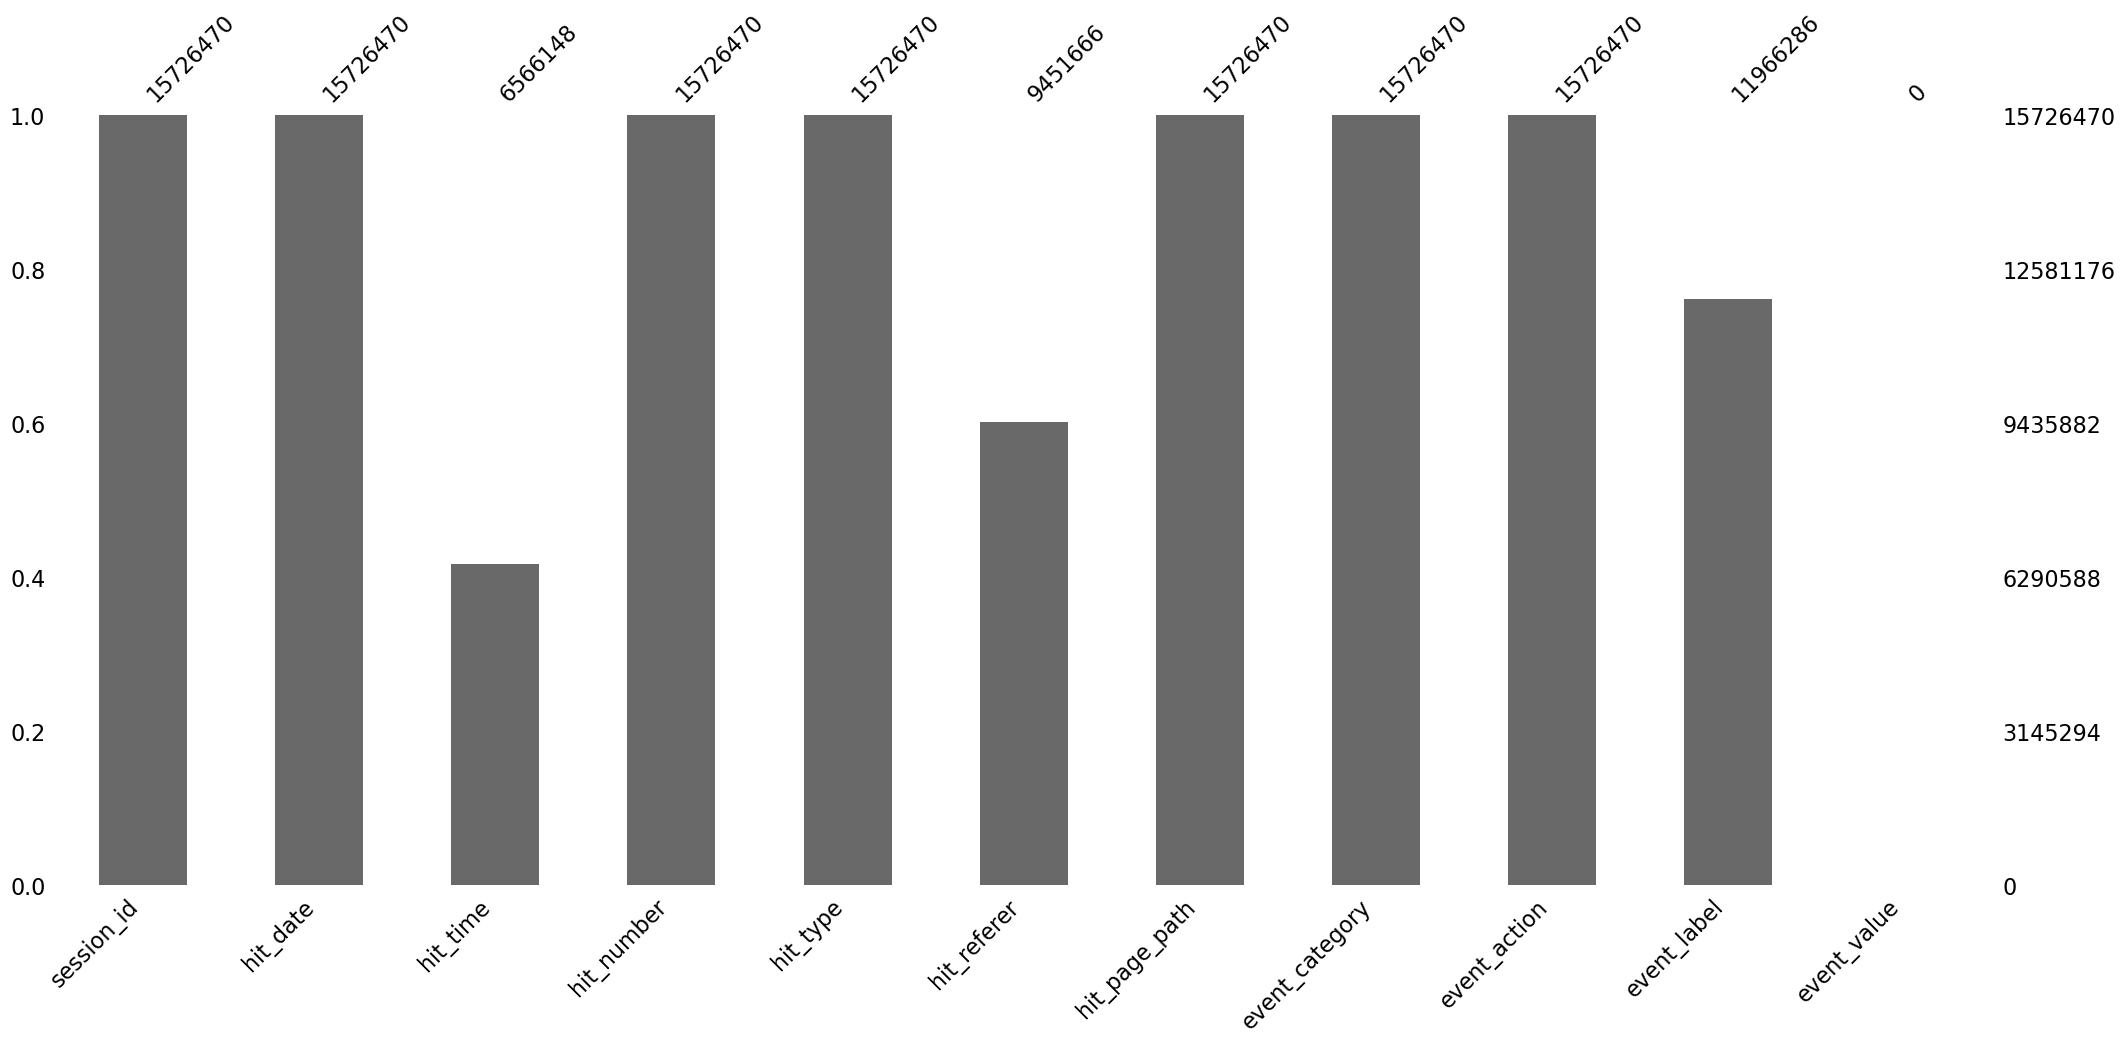

In [21]:
# Оценка полноты данных: количество заполненных столбцов и строк
msno.bar(df_h)

In [22]:
# убедимся, что столбец event_value пуст 
df_h.event_value.value_counts(dropna=False)

NaN    15726470
Name: event_value, dtype: int64

In [23]:
# проверка наличия строк-дубликатов
len(df_h[df_h.duplicated()])

0

In [24]:
# удаляем пустые и неинформативные признаки
df_h_clean = df_h.drop(columns=['hit_time', 'hit_type', 'hit_referer', 'event_label', 'event_value'])

In [25]:
df_h_clean.head(10)

,session_id,hit_date,hit_number,hit_page_path,event_category,event_action
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show
2,885342191847998240.1640235807.1640235807,2021-12-23,49,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show
3,142526202120934167.1640211014.1640211014,2021-12-23,46,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show
5,6466333295973247896.1640246168.1640246168,2021-12-23,41,sberauto.com/cars?utm_source_initial=youtube&u...,quiz,quiz_show
6,281215510786615563.1640245516.1640245516,2021-12-23,102,sberauto.com/cars/toyota?isnew=false&rental_ca...,quiz,quiz_show
7,4024492994895054107.1640269084.1640269084,2021-12-23,85,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show
8,555009234841130092.1640256620.1640256620,2021-12-23,101,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,quiz_show
9,2692901778487480807.1640206845.1640206845,2021-12-23,1,sberauto.com/cars/all/nissan/x-trail/0744675f?...,card_web,view_card


#### 2.2.2 ga_sessions

<AxesSubplot:>

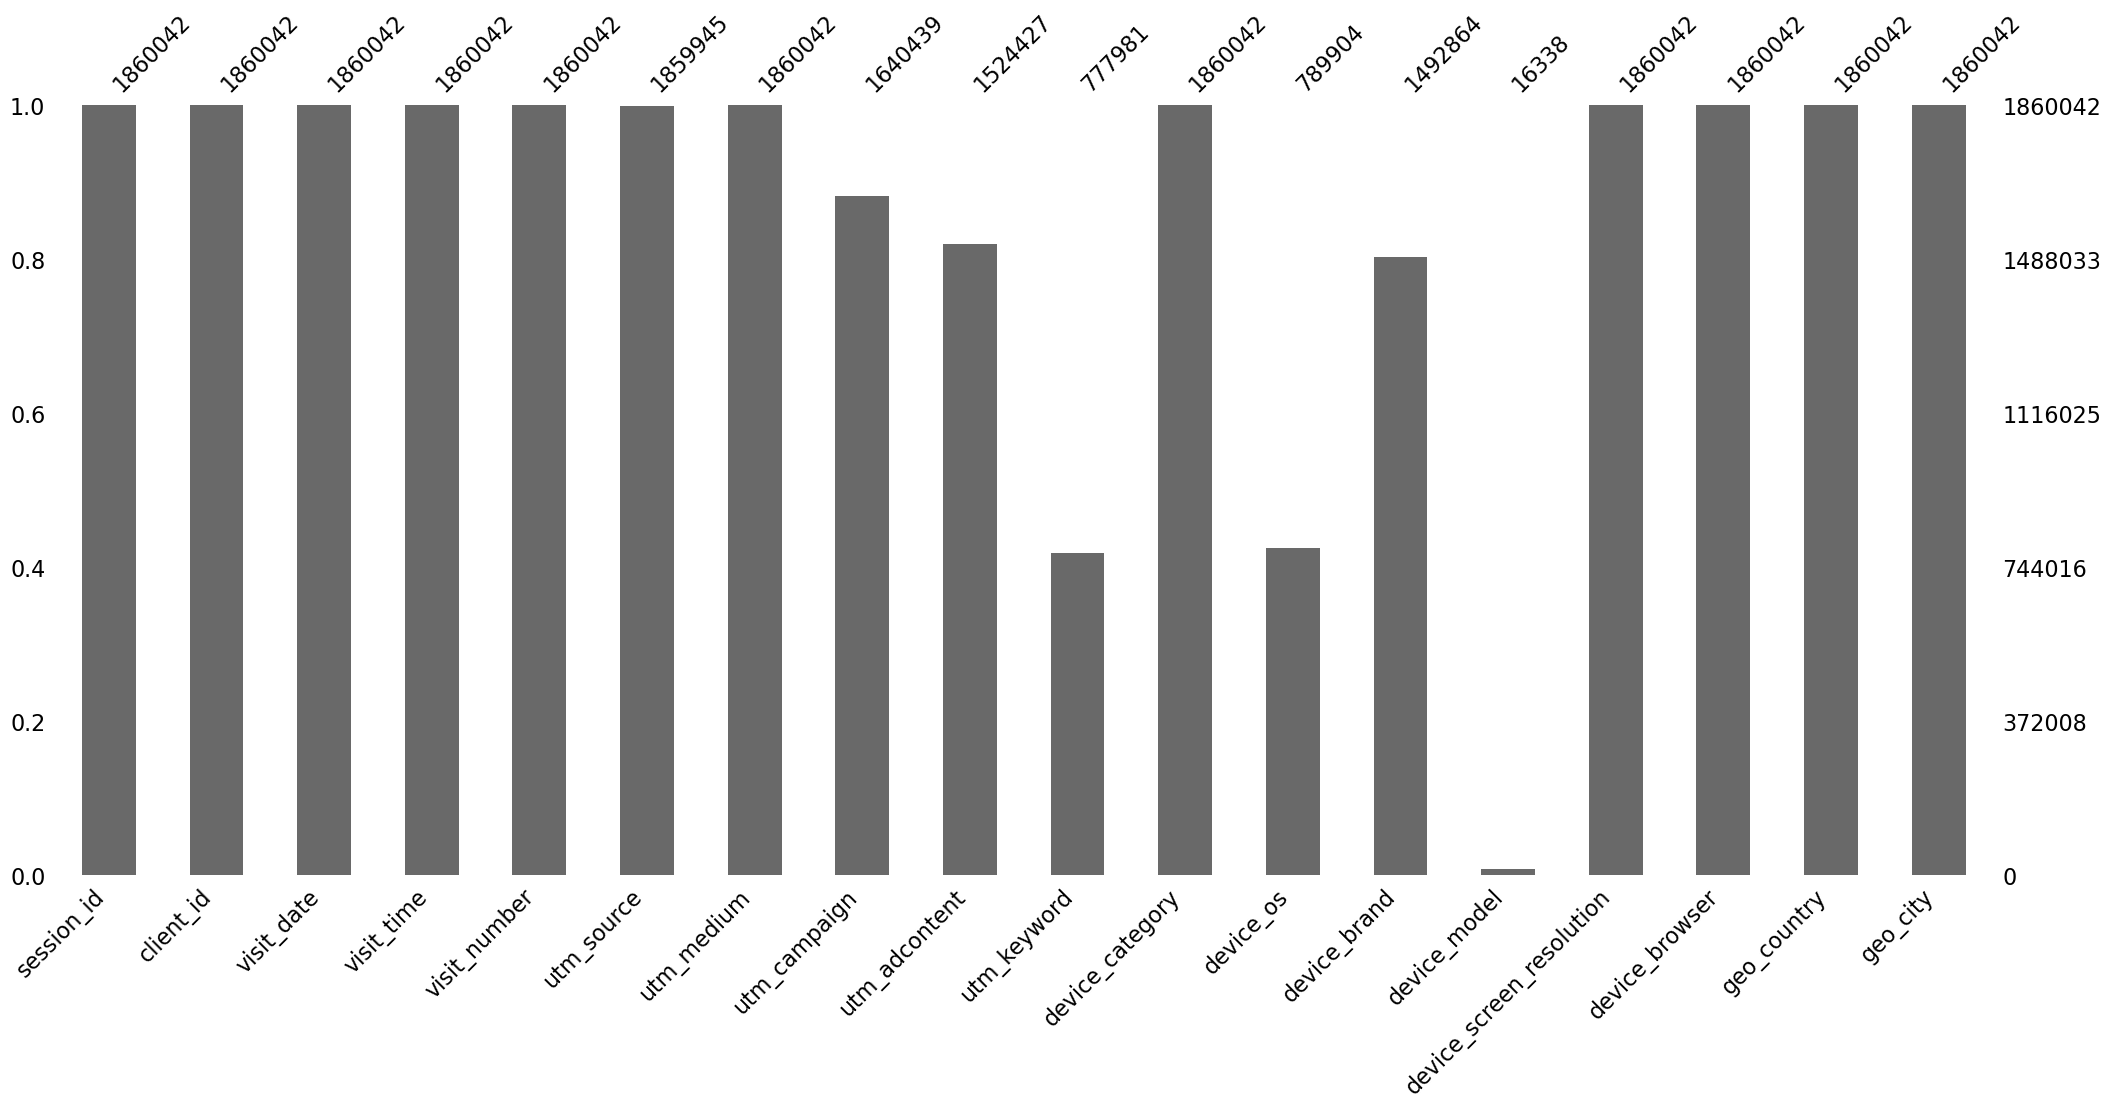

In [26]:
# Проверка наличия пропусков
msno.bar(df_s)

In [27]:
# Проверка наличия строк-дубликатов
len(df_s[df_s.duplicated()])

0

In [28]:
# Удаляем пустые и неинформативные признаки
df_s_clean = df_s.drop(columns=['visit_time', 'utm_adcontent', 'utm_keyword', 'device_os', 'device_brand', 'device_model', 
                                'device_screen_resolution', 'device_browser'])

In [29]:
df_s_clean.head()

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Russia,Moscow


### 2.3 Проверка и изменение типов данных

#### 2.3.1 ga_hits

In [30]:
# Информация о типе данных
df_h_clean.dtypes

session_id        object
hit_date          object
hit_number         int64
hit_page_path     object
event_category    object
event_action      object
dtype: object

In [31]:
# Преобразуем тип данных столбца hit_date в тип дата
df_h_clean['hit_date'] = pd.to_datetime(df_h_clean.hit_date, utc=True)

In [32]:
# Проверяем, что данные преобразовались в тип дата
df_h_clean.hit_date.head()

0   2021-12-23 00:00:00+00:00
1   2021-12-23 00:00:00+00:00
2   2021-12-23 00:00:00+00:00
3   2021-12-23 00:00:00+00:00
4   2021-12-23 00:00:00+00:00
Name: hit_date, dtype: datetime64[ns, UTC]

#### 2.3.2 ga_sessions

In [33]:
# Типы данных
df_s_clean.dtypes

session_id         object
client_id          object
visit_date         object
visit_number        int64
utm_source         object
utm_medium         object
utm_campaign       object
device_category    object
geo_country        object
geo_city           object
dtype: object

In [34]:
# Преобразуем тип данных столбца visit_date в тип дата
df_s_clean['visit_date'] = pd.to_datetime(df_s_clean.visit_date, utc=True)

In [35]:
# Проверяем, что данные преобразовались в тип дата
df_s_clean.visit_date.head()

0   2021-11-24 00:00:00+00:00
1   2021-11-14 00:00:00+00:00
2   2021-12-28 00:00:00+00:00
3   2021-05-29 00:00:00+00:00
4   2021-05-29 00:00:00+00:00
Name: visit_date, dtype: datetime64[ns, UTC]

### 2.4 Заполнение пропусков

#### ga_sessions: utm_source, utm_campaign

In [36]:
# Заполнияем пропуски столбца utm_source самым частотным признаком
df_s_clean['utm_source'] = df_s_clean.utm_source.fillna('ZpYIoDJMcFzVoPFsHGJL')

In [37]:
# Заполняем пропуски в столбце utm_campaign словом 'no advertising'
df_s_clean['utm_campaign'] = df_s_clean.utm_campaign.fillna('no advertising')

In [38]:
# Статистики заполненных признаков
df_s_clean[['utm_source', 'utm_campaign']].describe()

,utm_source,utm_campaign
count,1860042,1860042
unique,293,413
top,ZpYIoDJMcFzVoPFsHGJL,LTuZkdKfxRGVceoWkVyg
freq,578387,463481


## 3. Feature Engineering

### 3.1 ga_hits

#### 3.1.1 Стандартизация признака целевого события

In [39]:
# Формируем список из значений целевых действий
target_values = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click',
                'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']

# Вставляем столбец с нормализованным целевым событием: 1 - есть целевое действие, 0 - нет целевого действия
df_h_clean['target_action'] = np.where((df_h_clean.event_action.isin(target_values)), 1, 0)
df_h_clean.head()

,session_id,hit_date,hit_number,hit_page_path,event_category,event_action,target_action
0,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,30,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,0
1,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,41,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,0
2,885342191847998240.1640235807.1640235807,2021-12-23 00:00:00+00:00,49,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,0
3,142526202120934167.1640211014.1640211014,2021-12-23 00:00:00+00:00,46,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,0
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,79,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,0


In [40]:
# Уникальные значения сформированного столбца с маркером целевых действий
df_h_clean['target_action'].value_counts()

0    15621562
1      104908
Name: target_action, dtype: int64

In [41]:
# удаляем ненормализованный признак целевого события
df_h_clean = df_h_clean.drop(columns=['event_action'])
df_h_clean.head()

,session_id,hit_date,hit_number,hit_page_path,event_category,target_action
0,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,30,sberauto.com/cars?utm_source_initial=google&ut...,quiz,0
1,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,41,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,0
2,885342191847998240.1640235807.1640235807,2021-12-23 00:00:00+00:00,49,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,0
3,142526202120934167.1640211014.1640211014,2021-12-23 00:00:00+00:00,46,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,0
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,79,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,0


In [42]:
# Определяем, сколько целевых действий совершено за один визит: группировка целевых событий по id визита
df_ta = df_h_clean.groupby(['session_id'], as_index=False)[['target_action']].sum()

In [43]:
df_ta.sort_values(by=['target_action'], ascending=False)[:10]

,session_id,target_action
1281576,7140505447604038223.1630415440.1630415440,474
286145,2375944964542858067.1635025747.1635025747,83
676515,4245963133837464050.1640882501.1640882501,81
1697608,9126246154865944745.1636772009.1636772009,74
1485462,8112688049712084307.1621439828.1621439828,73
1361414,7518333712042258254.1636462243.1636462243,67
1361639,7518333712042258254.1639563879.1639563879,50
53876,1259773107082089014.1631048249.1631048249,49
1255848,701680538324125081.1622735271.1622735271,48
1710817,9188187984229163017.1635639790.1635639790,47


In [44]:
# Размерность сгруппированного датафрейма с целевыми событиями
df_ta.shape

(1734610, 2)

In [45]:
# Добавляем столбец target - целевое действие. 
# Условие: если целевых действий за один визит несколько, то считаем их как одно целевое действие 
df_ta['target'] = df_ta['target_action'].apply(lambda x: '1' if x >= 1 else '0')

In [46]:
# Убедимся, что замена прошла верно
df_ta.sort_values(by=['target_action'], ascending=False)[:10]

,session_id,target_action,target
1281576,7140505447604038223.1630415440.1630415440,474,1
286145,2375944964542858067.1635025747.1635025747,83,1
676515,4245963133837464050.1640882501.1640882501,81,1
1697608,9126246154865944745.1636772009.1636772009,74,1
1485462,8112688049712084307.1621439828.1621439828,73,1
1361414,7518333712042258254.1636462243.1636462243,67,1
1361639,7518333712042258254.1639563879.1639563879,50,1
53876,1259773107082089014.1631048249.1631048249,49,1
1255848,701680538324125081.1622735271.1622735271,48,1
1710817,9188187984229163017.1635639790.1635639790,47,1


In [47]:
# Удаляем столбец target_action с количеством целевых действий. Далее используем вместо него - target
df_ta = df_ta.drop(columns=['target_action'])
df_ta.sort_values(by=['target'], ascending=False)[:10]

,session_id,target
867305,5154780137798010968.1622186277.1622186277,1
541775,3598973774983326.1634332830.1634332830,1
106359,151329253004165836.1634747084.1634747084,1
358916,2722364755904441966.1622814318.1622814318,1
358924,2722419426554938003.1634599569.1634599569,1
1386211,7636606365362129042.1625655443.1625655443,1
358937,2722519044013859832.1622057976.1622057976,1
106330,1513159964038757790.1625261422.1625261422,1
1631488,8808825072137873358.1632992033.1632992033,1
541838,3599386121285120460.1621864909.1621864909,1


#### 3.1.2 Извлечение марки и модели автомобиля

In [48]:
# Изучение признака hit_page_path
df_h_clean.iloc[0:20, 3]

0     sberauto.com/cars?utm_source_initial=google&ut...
1     sberauto.com/cars/fiat?city=1&city=18&rental_c...
2     sberauto.com/cars/all/volkswagen/polo/e994838f...
3     sberauto.com/cars?utm_source_initial=yandex&ut...
4     sberauto.com/cars/all/mercedes-benz/cla-klasse...
5     sberauto.com/cars?utm_source_initial=youtube&u...
6     sberauto.com/cars/toyota?isnew=false&rental_ca...
7     sberauto.com/cars/all/mercedes-benz/glc/f8f330...
8     sberauto.com/cars/all/kia/sorento/c38179cb?utm...
9     sberauto.com/cars/all/nissan/x-trail/0744675f?...
10    sberauto.com/cars/all/porsche/911/f149c91b?ren...
11    sberauto.com/cars/all/nissan/qashqai/bfc21661?...
12    sberauto.com/cars/all/renault/duster/145d53f1?...
13    sberauto.com/cars/all/porsche/911/f149c91b?ren...
14    sberauto.com/cars/all/skoda/rapid/bf24b977?ren...
15    sberauto.com/cars/all/skoda/rapid/bf24b977?ren...
16    sberauto.com/cars/all/porsche/911/f149c91b?ren...
17    sberauto.com/cars/all/renault/logan/8c3c73

In [49]:
# Извлекаем марку автомобиля в столбец auto_name
df_h_clean['auto_name'] = df_h_clean.hit_page_path.str.split('/').str[3]

In [50]:
df_h_clean.auto_name[:10]

0              NaN
1              NaN
2       volkswagen
3              NaN
4    mercedes-benz
5              NaN
6              NaN
7    mercedes-benz
8              kia
9           nissan
Name: auto_name, dtype: object

In [51]:
df_h_clean['auto_name'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                12198829
skoda                                                                                                                                                                                                                                                                                                                                                                                                       

In [52]:
# Дополнительная обработка для извлечения марки автомобиля
df_h_clean['auto_name'] = df_h_clean['auto_name'].str.split('?').str[0]

In [54]:
df_h_clean['auto_name'].value_counts(dropna=False)

NaN                                                                                                           12198829
skoda                                                                                                           745006
mercedes-benz                                                                                                   472944
volkswagen                                                                                                      417627
lada-vaz                                                                                                        404543
                                                                                                                ...   
hqd6otu4c5+f+plbiatvtake8vc+ydf                                                                                      1
expert                                                                                                               1
7ngw5yylihwyqdhfjsf3mkxyk36uguq2eyrzlbbvrlsgexzs

In [53]:
# Заполняем пустые значения параметром 'other'
df_h_clean.auto_name = df_h_clean.auto_name.fillna('other')
df_h_clean['auto_name'].value_counts(dropna=False)

other                                                                                                         12198829
skoda                                                                                                           745006
mercedes-benz                                                                                                   472944
volkswagen                                                                                                      417627
lada-vaz                                                                                                        404543
                                                                                                                ...   
hqd6otu4c5+f+plbiatvtake8vc+ydf                                                                                      1
expert                                                                                                               1
7ngw5yylihwyqdhfjsf3mkxyk36uguq2eyrzlbbvrlsgexzs

In [54]:
# Извлекаем модель автомобиля в столбец auto_model
df_h_clean['auto_model'] = df_h_clean.hit_page_path.str.split('/').str[4]

In [55]:
df_h_clean['auto_model'].value_counts(dropna=False)

NaN                                                                                                                                                               12212225
rapid                                                                                                                                                               442513
vesta                                                                                                                                                               403910
polo                                                                                                                                                                318075
karoq                                                                                                                                                               194273
                                                                                                                                                 

In [56]:
# Дообработка столбца auto_model
df_h_clean['auto_model'] = df_h_clean.auto_model.str.split('?').str[0]

In [57]:
# Заполняем пустые значения в столбце auto_model значением other
df_h_clean.auto_model = df_h_clean.auto_model.fillna('other')

In [58]:
# удаляем столбец hit_page_path, из которого извлекли информацию о марке и модели автомобиля
df_h_clean = df_h_clean.drop(columns=['hit_page_path'])
df_h_clean.head()

,session_id,hit_date,hit_number,event_category,target_action,auto_name,auto_model
0,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,30,quiz,0,other,other
1,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,41,quiz,0,other,other
2,885342191847998240.1640235807.1640235807,2021-12-23 00:00:00+00:00,49,quiz,0,volkswagen,polo
3,142526202120934167.1640211014.1640211014,2021-12-23 00:00:00+00:00,46,quiz,0,other,other
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,79,quiz,0,mercedes-benz,cla-klasse


In [59]:
print('Размерность обработанного датафрейма')
df_h_clean.shape

Размерность обработанного датафрейма


(15726470, 7)

<AxesSubplot:>

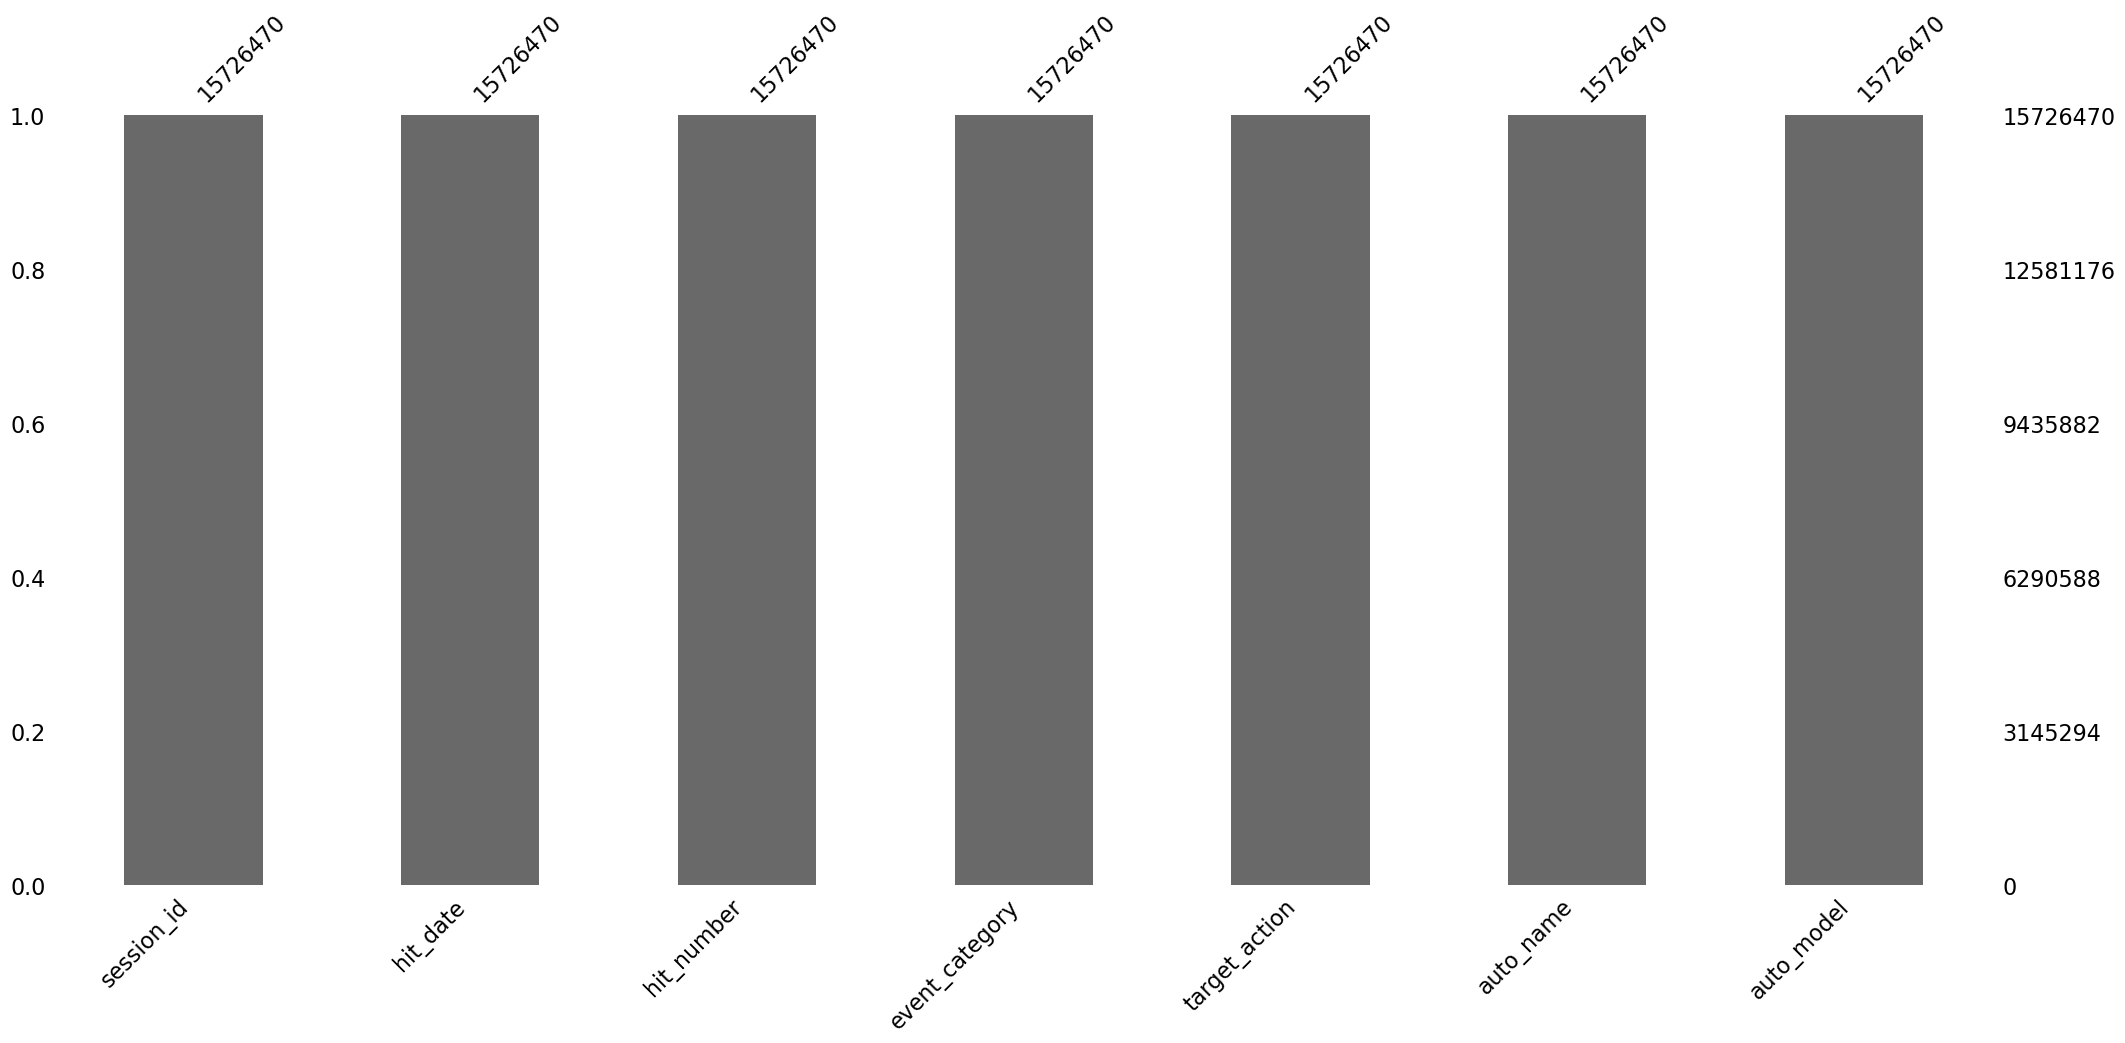

In [60]:
# Проверяем полноту данных обработанного датафрейма
msno.bar(df_h_clean)

In [62]:
df_h_clean.head()

,session_id,hit_date,hit_number,event_category,target_action,auto_name,auto_model
0,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,30,quiz,0,other,other
1,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,41,quiz,0,other,other
2,885342191847998240.1640235807.1640235807,2021-12-23 00:00:00+00:00,49,quiz,0,volkswagen,polo
3,142526202120934167.1640211014.1640211014,2021-12-23 00:00:00+00:00,46,quiz,0,other,other
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,79,quiz,0,mercedes-benz,cla-klasse


###  3.2 ga_sessions

#### 3.2.1 Формируем признак advert_sn - с маркером наличия рекламы в соцсетях

In [63]:
# Формируем список из значений столбца utm_source 'Реклама в социальных сетях' 
advertising_sn_values = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo',
                        'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

# Вставляем столбец advert_SM - канал привлечения - с маркером: 1 - реклама в социальных сетях, 0 - другие каналы.
df_s_clean['advert_sn'] = np.where((df_s_clean.utm_source.isin(advertising_sn_values)), 1, 0)
df_s_clean.head()

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,advert_sn
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24 00:00:00+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14 00:00:00+00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,1
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28 00:00:00+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29 00:00:00+00:00,1,kjsLglQLzykiRbcDiGcD,cpc,no advertising,mobile,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29 00:00:00+00:00,2,kjsLglQLzykiRbcDiGcD,cpc,no advertising,mobile,Russia,Moscow,0


In [64]:
# Уникальные значения столбца advert_sn
df_s_clean['advert_sn'].value_counts()

0    1585815
1     274227
Name: advert_sn, dtype: int64

#### 3.2.2 Формируем признак traffic_way - с маркером органического и платного трафика

In [65]:
# Формируем список из значений utm_medium для значения 'Органический трафик'
natural_traffic = ['organic', 'referral', '(none)']

# Вставляем столбец traffic_way с маркером: "free" - органический трафик, "paid" - платный (неорганический) трафик.
df_s_clean['traffic_way'] = np.where((df_s_clean.utm_medium.isin(natural_traffic)), 'free', "paid")
df_s_clean.head()

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,advert_sn,traffic_way
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24 00:00:00+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust,0,paid
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14 00:00:00+00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,1,paid
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28 00:00:00+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk,0,paid
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29 00:00:00+00:00,1,kjsLglQLzykiRbcDiGcD,cpc,no advertising,mobile,Russia,Moscow,0,paid
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29 00:00:00+00:00,2,kjsLglQLzykiRbcDiGcD,cpc,no advertising,mobile,Russia,Moscow,0,paid


In [66]:
# Уникальные значения столбца traffic_way
df_s_clean['traffic_way'].value_counts()

paid    1344383
free     515659
Name: traffic_way, dtype: int64

#### 3.2.3 Формируем признак city_of_present - с маркером города присутствия

In [67]:
# Список городов присутствия: Москвы и области, Санкт-Петербурга
list_city_present = ['Moscow', 'Saint Petersburg', 'Balashikha', 'Bronnitsy', 'Chekhov', 'Chernogolovka', 'Dmitrov', 
                     'Dolgoprudny', 'Domodedovo', 'Dubna', 'Dzerzhinsky', 'Elektrogorsk', 'Elektrostal', 'Fryazino', 'Istra',
                    'Ivanteyevka', 'Kashira', 'Khimki', 'Klin', 'Kolomna', 'Korolyov', 'Kotelniki', 'Krasnoarmeysk',
                     'Krasnogorsk', 'Lobnya', 'Losino-Petrovsky', 'Lukhovitsy', 'Lytkarino', 'Lyubertsy', 'Mozhaysk', 
                    'Mytishchi', 'Naro-Fominsk', 'Noginsk', 'Odintsovo', 'Orekhovo-Zuyevo', 'Ozyory', 'Pavlovsky Posad',
                    'Podolsk', 'Protvino', 'Pushchino', 'Pushkino', 'Ramenskoye', 'Reutov', 'Roshal', 'Ruza', 'Shatura',
                    'Shchyolkovo', 'Sergiyev Posad', 'Serpukhov', 'Solnechnogorsk', 'Stupino', 'Taldom', 'Vidnoye',
                     'Volokolamsk', 'Voskresensk', 'Yegoryevsk', 'Zaraysk', 'Zhukovsky']

# Вставляем столбец city_of_present с маркером городов присутствия: "present" - город присутствия, "other" - остальные города.
df_s_clean['city_of_present'] = np.where((df_s_clean.geo_city.isin(list_city_present)), 'present', 'other')
df_s_clean.head()

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,advert_sn,traffic_way,city_of_present
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24 00:00:00+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust,0,paid,other
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14 00:00:00+00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,1,paid,present
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28 00:00:00+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk,0,paid,other
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29 00:00:00+00:00,1,kjsLglQLzykiRbcDiGcD,cpc,no advertising,mobile,Russia,Moscow,0,paid,present
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29 00:00:00+00:00,2,kjsLglQLzykiRbcDiGcD,cpc,no advertising,mobile,Russia,Moscow,0,paid,present


In [68]:
print('Размерность обработанного датафрейма')
df_s_clean.shape

Размерность обработанного датафрейма


(1860042, 13)

<AxesSubplot:>

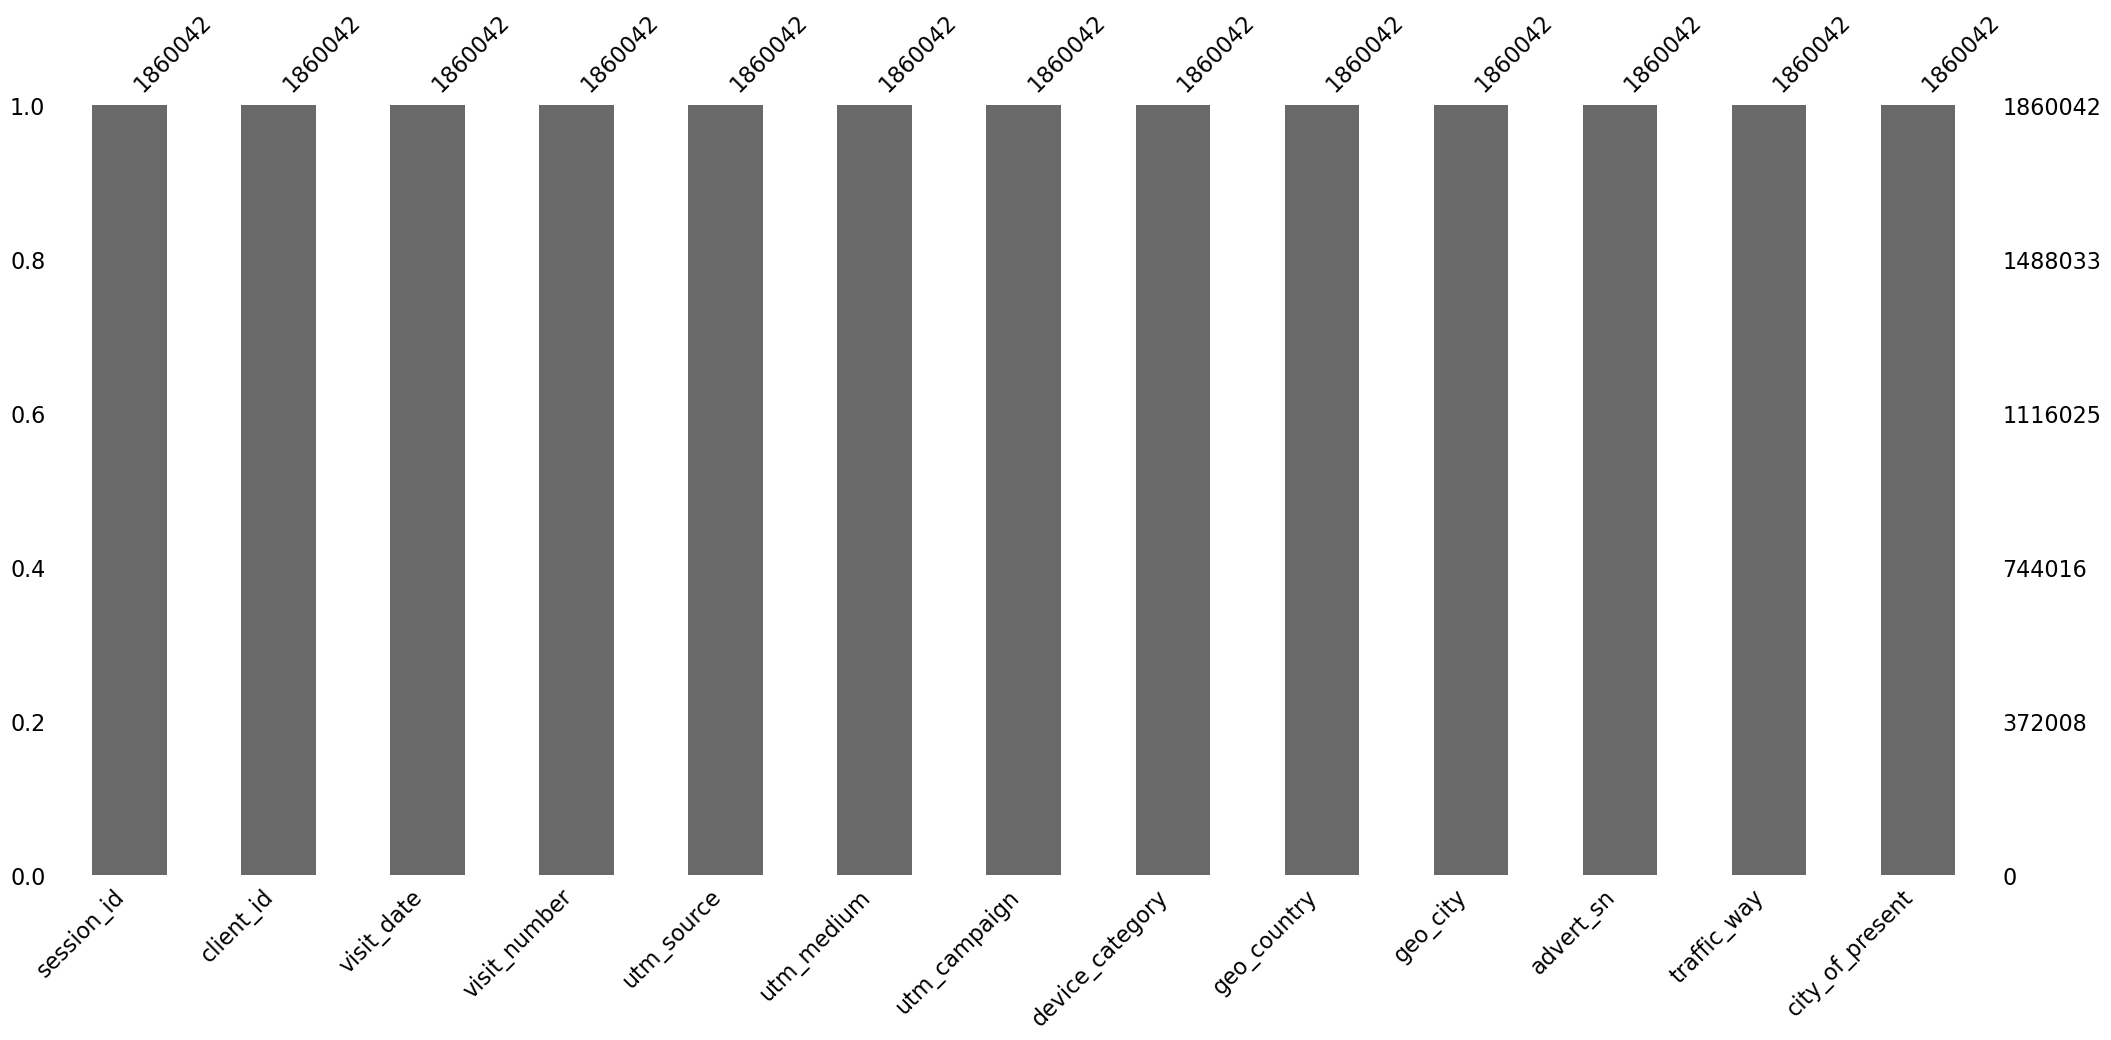

In [69]:
# Проверяем пропуски обработанного датафрейма
msno.bar(df_s_clean)

## 4. Data Visualization

### 4.1 ga_hits: порядковый номер события

In [70]:
# Статистики для столбца hit_number - порядковый номер события в рамках сессии
df_h_clean.hit_number.describe().apply(lambda x: f'{x:1.0f}')

count    15726470
mean           24
std            29
min             1
25%             7
50%            15
75%            29
max           500
Name: hit_number, dtype: object

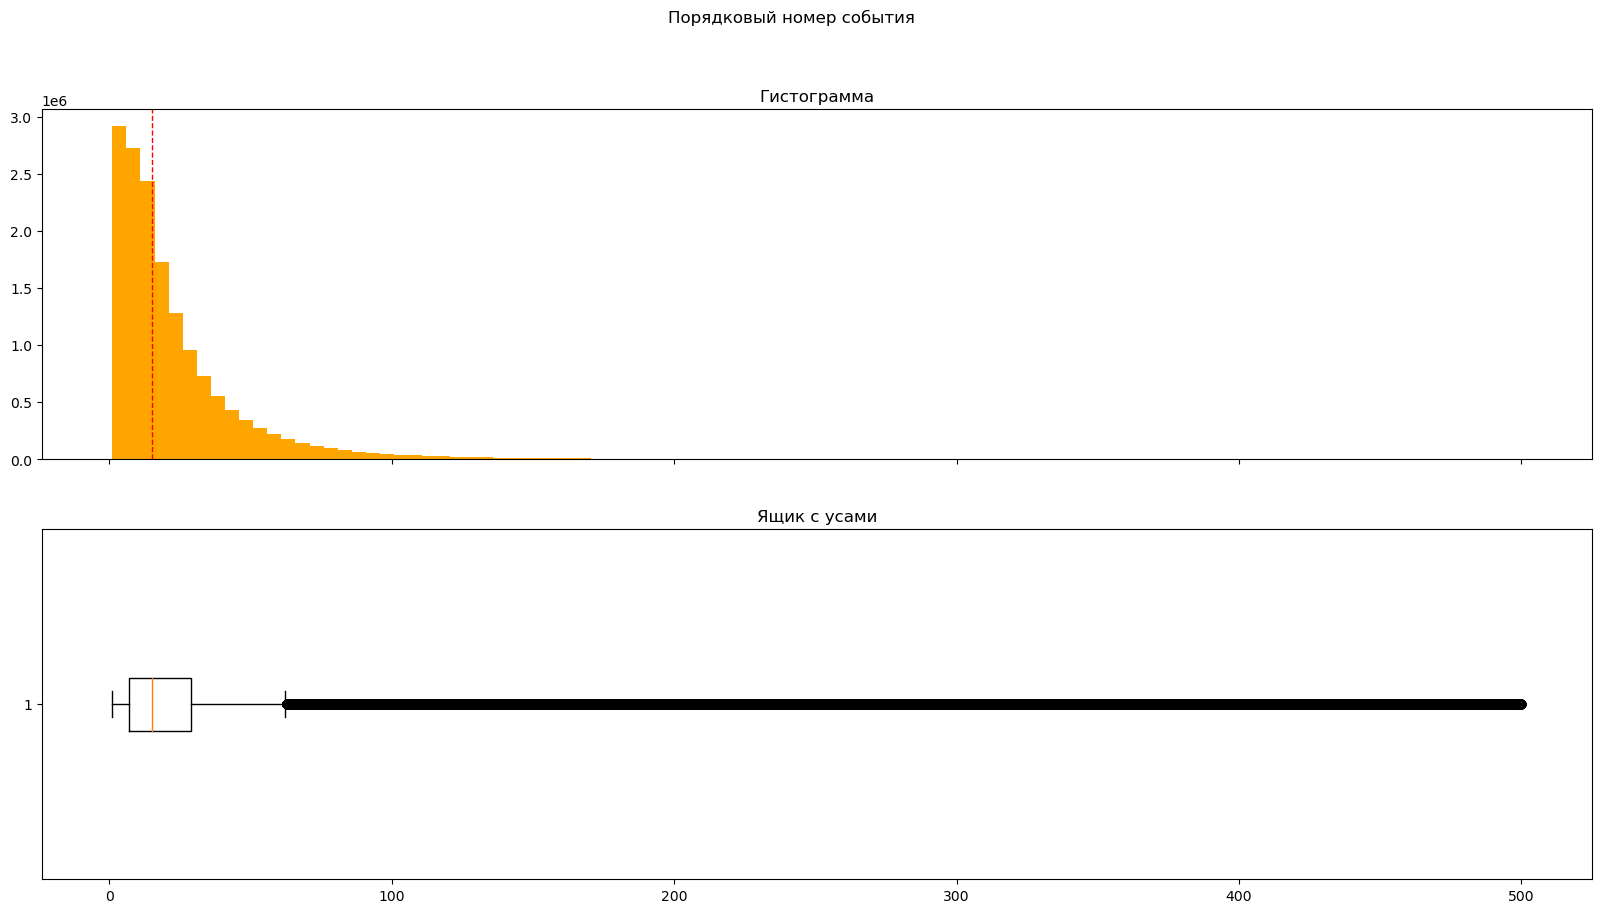

In [71]:
# Распределение порядковых номеров событий в рамках сессии
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True)

ax1.hist(df_h_clean.hit_number, bins=100, color='orange')
ax1.set_title('Гистограмма')
ax1.axvline(df_h_clean.hit_number.median(), color='red', linestyle='dashed', linewidth=1)

ax2.boxplot(df_h_clean.hit_number, vert=False)
ax2.set_title('Ящик с усами')

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.suptitle('Порядковый номер события');

Среднее количество событий, совершаемых одним пользователем в рамках сессии - 24.

In [72]:
# Группировка целевых действий по порядковому номеру события в сессии
stats = df_h_clean.groupby(['hit_number'], as_index=False)[['target_action']].sum()
stats = stats.rename(columns={'target_action': 'quantity_target_actions'})
stats_ta = stats[stats['quantity_target_actions'] > 0]
stats_ta = stats_ta[:100]
stats_ta

,hit_number,quantity_target_actions
0,1,974
1,2,646
2,3,541
3,4,6663
4,5,2709
...,...,...
95,96,118
96,97,125
97,98,101
98,99,95


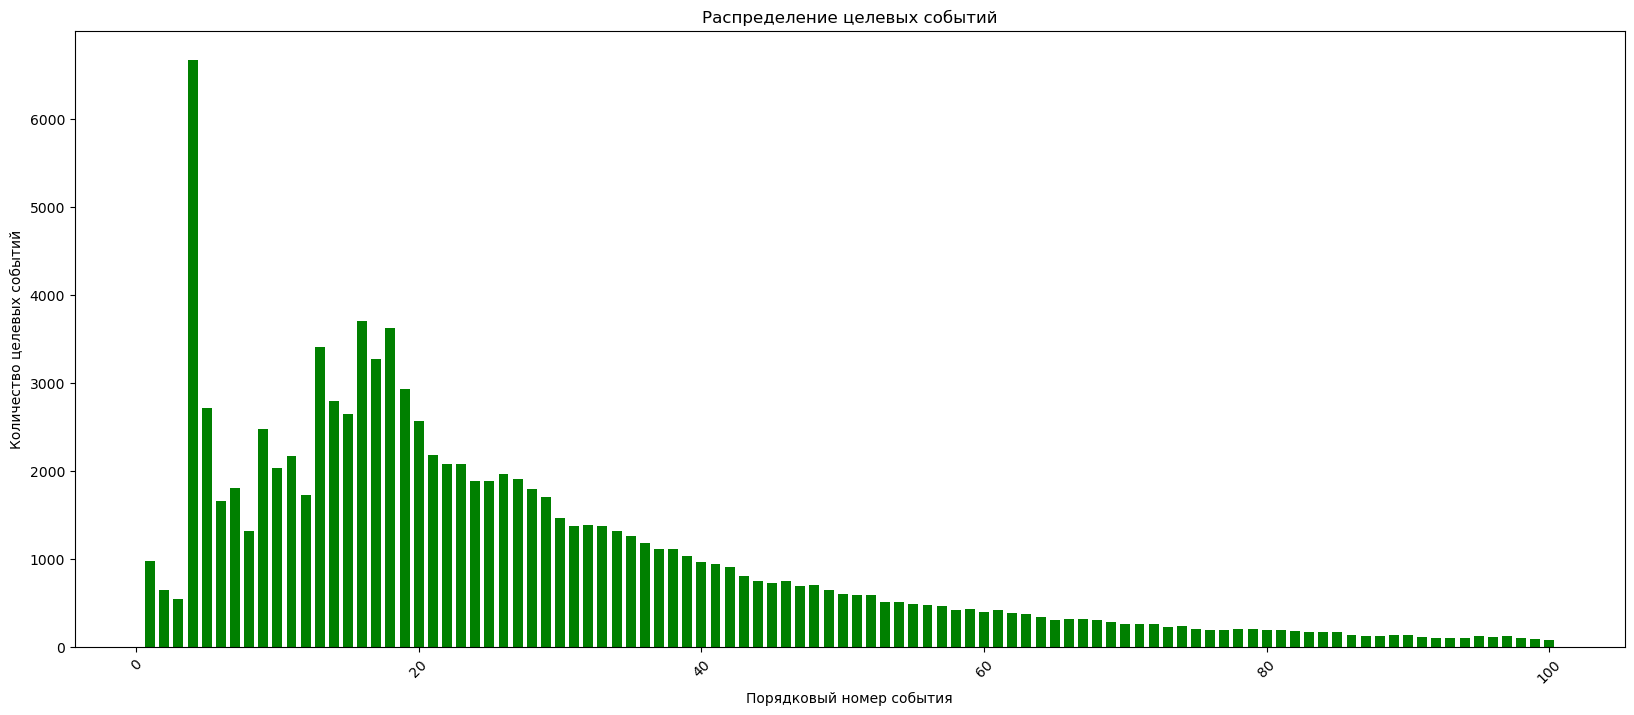

In [73]:
# График распределения количества целевых действий в зависимости от порядкового номера события в сессии
plt.figure(figsize=(20, 8))
plt.bar(stats_ta['hit_number'], stats_ta['quantity_target_actions'], color=['green'], width=0.7)
plt.xlabel('Порядковый номер события')
plt.xticks(rotation=45)
plt.ylabel('Количество целевых событий')
plt.title('Распределение целевых событий');

Наибольшее количество целевых событий происходит на четвертом событии, совершаемом пользователем.

### 4.2 ga_sessions: порядковый номер визита

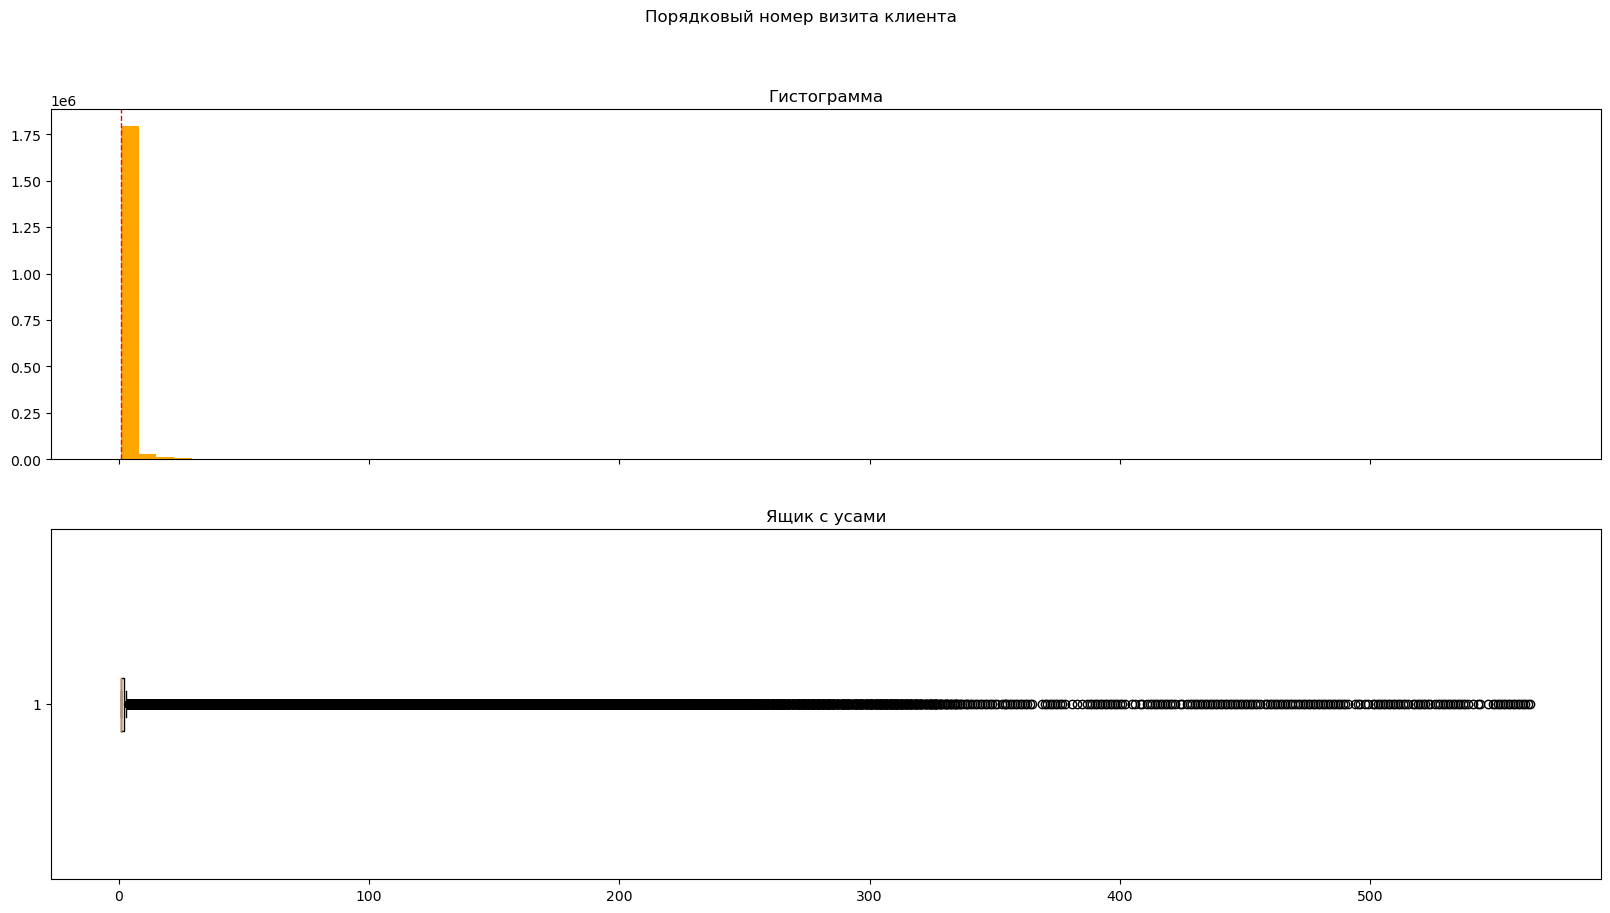

In [74]:
# Распределение порядковых номеров визита клиента
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True)

ax1.hist(df_s_clean.visit_number, bins=80, color='orange')
ax1.set_title('Гистограмма')
ax1.axvline(df_s_clean.visit_number.median(), color='red', linestyle='dashed', linewidth=1)

ax2.boxplot(df_s_clean.visit_number, vert=False)
ax2.set_title('Ящик с усами')

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.suptitle('Порядковый номер визита клиента');

Из-за большого разброса основная часть графика ("ящик") почти незаметна.

## 5. Сохранение обработанных датафреймов в csv файлы

In [75]:
# Сохраняем обработанного датафрейма ga_hits в файл
df_h_clean.to_csv('data/ga_hits_clean.csv', index=False)

Описание атрибутов датафрейма событий из файла ga_hits_clean.csv:

- session_id - ID визита;
- hit_date - дата события;
- hit_number - порядковый номер события в рамках сессии;
- event_category - тип действия;
- target_action - целевое действие;
- auto_name - марка автомобиля;
- auto_model - модель автомобиля.

In [76]:
# Сохранение обработанного датафрейма ga_sessions в файл csv
df_s_clean.to_csv('data/ga_sessions_clean.csv', index=False)

Описание атрибутов датафрейма визитов из файла ga_sessions_clean.csv:

- session_id - ID визита;
- client_id - ID посетителя;
- visit_date - дата визита;
- visit_number - порядковый номер визита клиента;
- utm_source - канал привлечения;
- utm_medium - тип привлечения;
- utm_campaign - рекламная кампания;
- device_category - тип устройства;
- geo_country - страна;
- geo_city - город;
- advert_sn - нормализованный канал привлечения: 1 - реклама в социальных сетях, 0 - другие каналы;
- traffic_way - нормализованный тип привлечения: "free" - органический трафик, "paid" - платный (неорганический) трафик;
- city_of_present - город присутствия, где present - Москва и область, Санкт-Петербург, other - города, где нет присутствия.

# Часть 2. Объединение и обработка данных визитов и целевого события

## 1. Объединение датафреймов

In [77]:
# Объединяем датафреймы визитов и целевого события
df_join = pd.merge(left=df_s_clean, right=df_ta, on='session_id', how='left')

In [78]:
df_join.head()

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,advert_sn,traffic_way,city_of_present,target
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24 00:00:00+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust,0,paid,other,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14 00:00:00+00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,1,paid,present,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28 00:00:00+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk,0,paid,other,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29 00:00:00+00:00,1,kjsLglQLzykiRbcDiGcD,cpc,no advertising,mobile,Russia,Moscow,0,paid,present,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29 00:00:00+00:00,2,kjsLglQLzykiRbcDiGcD,cpc,no advertising,mobile,Russia,Moscow,0,paid,present,0


In [79]:
# Размерность объединенного датафрейма
df_join.shape

(1860042, 14)

## 2. Проверка и заполнение пропусков в target - целевое событие 

In [80]:
# Проверяем уникальные значения для целевого события
df_join.target.value_counts(dropna=False)

0      1681952
NaN     127776
1        50314
Name: target, dtype: int64

Есть пропуски в целевом событии, которые необходимо заполнить

In [81]:
# Заполняем пропуски целевого события на 0 
df_join.target = df_join.target.fillna(0)

<AxesSubplot:>

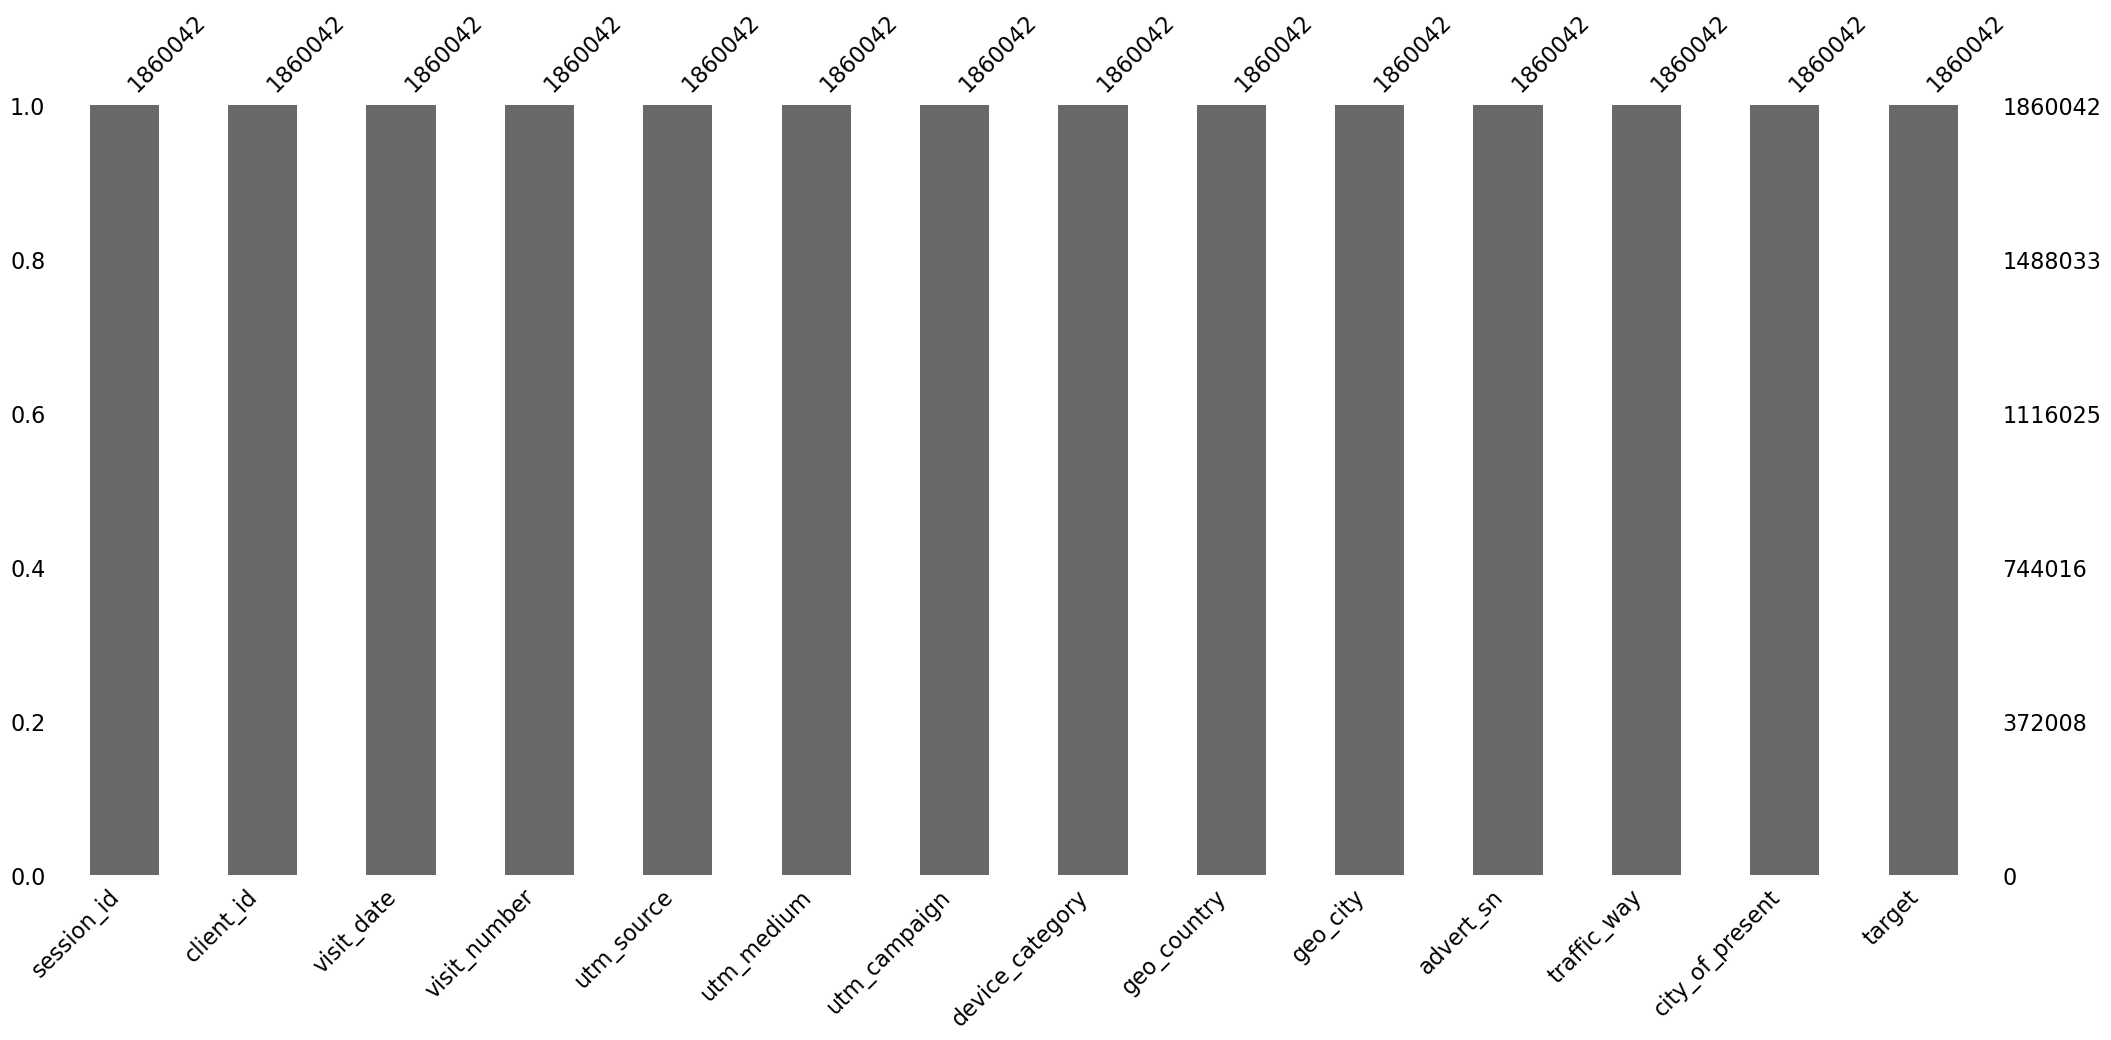

In [82]:
# Проверка отстутствия пропусков
msno.bar(df_join)

## 3. Проверка и изменение типа данных объединенного датафрейма

In [83]:
# Проверяем тип данных датафрейма
df_join.dtypes

session_id                      object
client_id                       object
visit_date         datetime64[ns, UTC]
visit_number                     int64
utm_source                      object
utm_medium                      object
utm_campaign                    object
device_category                 object
geo_country                     object
geo_city                        object
advert_sn                        int32
traffic_way                     object
city_of_present                 object
target                          object
dtype: object

In [84]:
# Меняем тип данных столбца target на int
df_join['target'] = pd.to_numeric(df_join['target'], downcast="signed")
df_join['target'] = df_join.target.astype('int')

In [85]:
df_join.target.value_counts(dropna=False)

0    1809728
1      50314
Name: target, dtype: int64

## 4. Сохранение объединенного датафрейма

In [86]:
# Сохранение объединенного датафрейма в файл csv
df_join.to_csv('data/ga_joined.csv', index=False)

Описание атрибутов датафрейма из файла **ga_joined.csv:**

- session_id - ID визита;
- client_id - ID посетителя;
- visit_date - дата визита;
- visit_number - порядковый номер визита клиента;
- utm_source - канал привлечения;
- utm_medium - тип привлечения;
- utm_campaign - рекламная кампания;
- device_category - тип устройства;
- geo_country - страна;
- geo_city - город;
- advert_sn - нормализованный канал привлечения: 1 - реклама в социальных сетях, 0 - другие каналы;
- traffic_way - нормализованный тип привлечения: "free" - органический трафик, "paid" - платный (неорганический) трафик;
- city_of_present - город присутствия, где present - Москва и область, Санкт-Петербург, other - города, где нет присутствия;
- target - целевое событие: 1 - имеется целевое событие, 0 - целевое событие отсутствует.